In [44]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

%matplotlib inline



In [45]:
shp_path = './colombia/MGN/MGN_URB_SECTOR.shp'
sf = shp.Reader(shp_path)
len(sf.shapes())

11570

In [46]:
sf.records()[100]

Record #100: ['05', '05001', '05001000', '050011000000000911', 0.0290988574079, 3.26567503192e-05, '0911']

In [47]:
#sf.records()

In [48]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.plot(x_lon,y_lat) 
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

def plot_shapes(ids, s = None):
    plt.figure(figsize = (20, 20))
    ax = plt.axes()
    ax.set_aspect('equal')
    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)        
        #if(x0 > -75.48):
        ax.plot(x_lon,y_lat) 
        #ax.text(x0, y0, id, fontsize=10)
        # use bbox (bounding box) to set plot limits
        #ax.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
        
    

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [49]:
df = read_shapefile(sf)
df.shape

(11570, 8)

In [50]:
df.head()

,DPTO_CCDGO,MPIO_CCDGO,CPOB_CCDGO,SETU_CCNCT,SHAPE_Leng,SHAPE_Area,SETU_CCDGO,coords
0,05,05001,05001000,050011000000000101,0.033971,0.000044,0101,"[(-75.54302103999999, 6.301717067000027), (-75..."
1,05,05001,05001000,050011000000000102,0.026389,0.000023,0102,"[(-75.54109420699996, 6.302452899000059), (-75..."
2,05,05001,05001000,050011000000000103,0.037891,0.000037,0103,"[(-75.54718700899997, 6.303599610000049), (-75..."
3,05,05001,05001000,050011000000000104,0.027320,0.000020,0104,"[(-75.54887449699999, 6.294900458000029), (-75..."
4,05,05001,05001000,050011000000000105,0.027725,0.000023,0105,"[(-75.55021189299998, 6.291648258000066), (-75..."


In [51]:
df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CCDGO'] == '05001')].head()

,DPTO_CCDGO,MPIO_CCDGO,CPOB_CCDGO,SETU_CCNCT,SHAPE_Leng,SHAPE_Area,SETU_CCDGO,coords
0,05,05001,05001000,050011000000000101,0.033971,0.000044,0101,"[(-75.54302103999999, 6.301717067000027), (-75..."
1,05,05001,05001000,050011000000000102,0.026389,0.000023,0102,"[(-75.54109420699996, 6.302452899000059), (-75..."
2,05,05001,05001000,050011000000000103,0.037891,0.000037,0103,"[(-75.54718700899997, 6.303599610000049), (-75..."
3,05,05001,05001000,050011000000000104,0.027320,0.000020,0104,"[(-75.54887449699999, 6.294900458000029), (-75..."
4,05,05001,05001000,050011000000000105,0.027725,0.000023,0105,"[(-75.55021189299998, 6.291648258000066), (-75..."


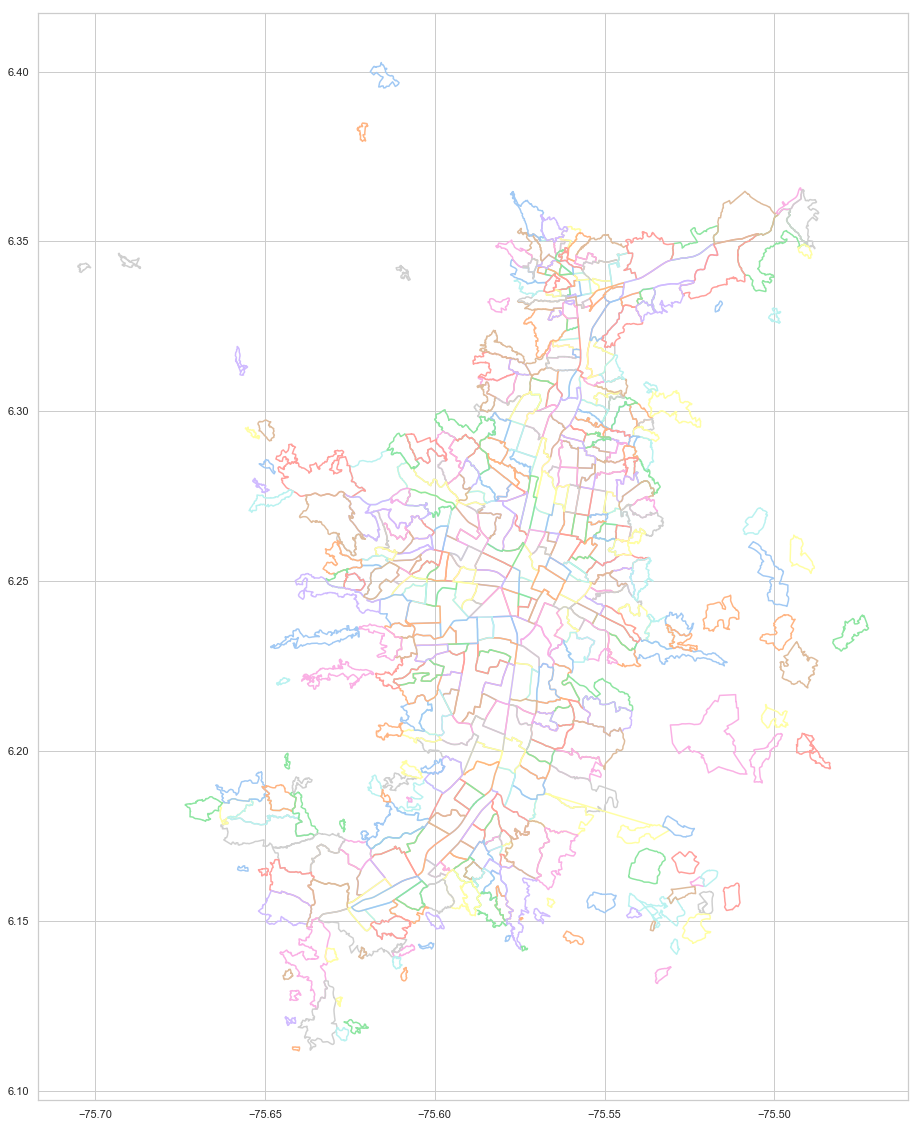

In [54]:
idxs = list(df[(df['DPTO_CCDGO'] == '05') & df['MPIO_CCDGO'].isin(['05001', '05088', '05266', '05212', '05360', '05631', '05380'])].index)
plot_shapes(idxs)